## Final assignment Unsupervised Learning

This assignment uses a dataset containing coordinates from markers of skull features from different species of primates. Using unsupervised learning techniques, a model will be made to cluster the data into species groups.

### loading packages used in this assignment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy import stats
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering, OPTICS
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, cophenet
from sklearn import metrics

In [2]:
df = pd.read_csv("Data/primates-morphology.csv")


## Data inspection and preperation

In [3]:
df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,25,26,27,28,29,Abbreviation,Genus,Species,Sex,Age
0,37773,133.426742,-101.627603,21.125902,-11.518251,4.621089,-1.519551,0.583410,-7.182875,1.410030,...,-0.301822,-0.433051,0.037651,-0.279618,-0.421040,Ph,Presbytis,hosei,U,A
1,37772,145.344740,-108.229812,21.121390,-14.982879,2.299335,-2.354040,0.431199,-5.266930,-1.424469,...,0.215340,-0.299550,0.709472,0.876382,-0.150133,Ph,Presbytis,hosei,F,A
2,22276,137.773342,-107.162743,18.232497,-17.116294,3.016809,-5.295234,1.716895,-1.668914,-1.917478,...,-0.481468,-0.243025,-0.537644,-0.140292,0.082158,Pr,Presbytis,rubicunda,U,A
3,37776,141.523739,-107.436626,17.448083,-16.861469,3.382894,-1.071286,1.768891,-2.735232,-1.136700,...,0.586941,-0.043639,-0.518699,-1.051100,0.542354,Pr,Presbytis,rubicunda,M,A
4,37777,142.357906,-97.195294,10.511391,-6.520641,3.555506,1.652390,-0.655919,-5.373075,-1.466841,...,0.653851,0.718319,0.798722,-0.396749,0.844772,Pr,Presbytis,rubicunda,F,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,41421,-91.085462,-46.160638,86.488654,16.969797,8.581993,-8.889106,3.806365,-2.572926,-1.852834,...,0.360452,0.513323,0.043604,0.294724,-0.003514,Hl,Hylobates,lar,F,A
161,41416,-91.489354,-39.614165,87.430951,20.871706,11.444575,-6.707486,1.910320,-5.616304,-3.878495,...,-0.368755,-0.173323,-0.627292,0.092090,0.444992,Hl,Hylobates,lar,F,A
162,41414,-90.204104,-40.985982,83.286250,19.714259,10.448984,-10.269775,4.749293,-2.725633,-1.577457,...,-0.033229,0.434486,-0.158110,-0.416191,0.160474,Hl,Hylobates,lar,F,A
163,41412,-90.248202,-50.111180,77.285086,19.578454,5.634918,-13.863556,1.840409,-0.507864,-1.227452,...,0.125275,-0.018511,0.080169,-0.235063,0.317110,Hl,Hylobates,lar,F,A


In [4]:
df.drop("Unnamed: 0", axis = 1, inplace = True)

This column was removed as it seems to be an index left over after making a subset of a dataset.

### Missing data

In [5]:
df.isnull().values.any()

False

There are no NaN values in the dataset

In [6]:
df.dtypes

0               float64
1               float64
2               float64
3               float64
4               float64
5               float64
6               float64
7               float64
8               float64
9               float64
10              float64
11              float64
12              float64
13              float64
14              float64
15              float64
16              float64
17              float64
18              float64
19              float64
20              float64
21              float64
22              float64
23              float64
24              float64
25              float64
26              float64
27              float64
28              float64
29              float64
Abbreviation     object
Genus            object
Species          object
Sex              object
Age              object
dtype: object

In [161]:
df.shape

(165, 35)

In [162]:
len(df["Species"].unique())

25

There are 25 different species

In [163]:
df["Species"].value_counts()

cristata        18
lar             18
polykomos       10
mitis           10
badius          10
troglodytes      9
larvatus         9
anubis           9
torquatus        9
fascicularis     8
rubicunda        8
gorilla          6
albigena         6
talapoin         5
hosei            5
leucophaeus      4
patas            4
mulatta          3
paniscus         3
fuscata          2
sphinx           2
sylvanus         2
syndactylus      2
pygmaeus         2
gelada           1
Name: Species, dtype: int64

since there is only 1 datapoint for gelada it is unlikely this species will be determined correctly. for the other species with a low amount of datapoints, the accuracy of their determination will likely be low.

The data will be seperated by values and labels. since the project is to separate the group into different species, only the Species column can be used to verify the model. the other labels are not required for this assignment

In [164]:
df_values = df.iloc[:, 0:30]
df_labels = df["Species"]

In [165]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,...,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,5.537129,1.196007,-0.125596,0.774423,-0.161111,-0.182550,-0.077955,0.180683,0.132617,-0.030271,...,0.057334,-0.014223,0.013269,-0.002892,0.005006,0.003208,-0.001137,-0.002748,-0.012738,-0.013131
std,99.061556,69.971050,56.627559,18.591984,11.336600,8.710069,5.463093,5.214248,4.520787,3.389125,...,1.254471,1.161247,0.971599,0.932425,0.865874,0.750532,0.720479,0.484438,0.461879,0.374258
min,-201.591249,-111.659165,-114.986835,-54.636918,-19.375303,-24.431319,-54.611282,-20.855026,-18.487708,-13.764311,...,-3.793245,-2.894577,-3.849517,-1.838070,-2.274559,-2.037714,-2.934118,-1.245955,-2.115305,-1.128128
25%,-58.767559,-44.542377,-45.981261,-12.328664,-7.348686,-5.823589,-1.389680,-2.572926,-2.279476,-1.834020,...,-0.697783,-0.739499,-0.482541,-0.585089,-0.587203,-0.413921,-0.411248,-0.300449,-0.320591,-0.248282
50%,-4.994670,18.343281,-2.090244,4.082730,-2.158090,-1.071286,-0.124301,-0.379776,-0.057433,-0.158941,...,0.086293,-0.103932,0.123128,-0.072030,-0.018886,-0.023107,-0.022457,0.001251,-0.018000,-0.010527
75%,89.480991,42.633134,32.805157,16.969797,3.716401,5.078963,1.575336,3.017432,3.199454,1.722897,...,0.784991,0.633467,0.526249,0.512882,0.621830,0.474782,0.418680,0.274560,0.277566,0.268744
max,192.170450,433.444316,142.161119,33.486208,68.005131,21.570367,18.598186,20.232449,18.859660,11.154277,...,3.300278,3.376167,3.423704,4.006407,3.131717,2.052453,2.727110,1.319978,1.653007,0.844772


The data seems to have a large difference in range between features. the data might have to be scaled to adress this.

### Skewness

In [166]:
df_values.skew()

0     0.009842
1     1.272854
2     0.408304
3    -0.553588
4     2.358456
5     0.262781
6    -5.635667
7     0.348291
8     0.048778
9    -0.118507
10   -0.480534
11   -0.459593
12   -1.350822
13    0.017725
14    1.267799
15    0.023271
16   -0.112908
17   -0.025797
18    0.049919
19   -0.702592
20   -0.097343
21    0.144393
22   -0.265555
23    0.782396
24    0.192550
25    0.093233
26    0.211428
27    0.081003
28   -0.114840
29   -0.251496
dtype: float64

The data has skewness in some features. this might need to be adressed by scaling, removing outliers, or normalizing.

### Distribution
to visualize the distribution, a figure is made of the feature's values

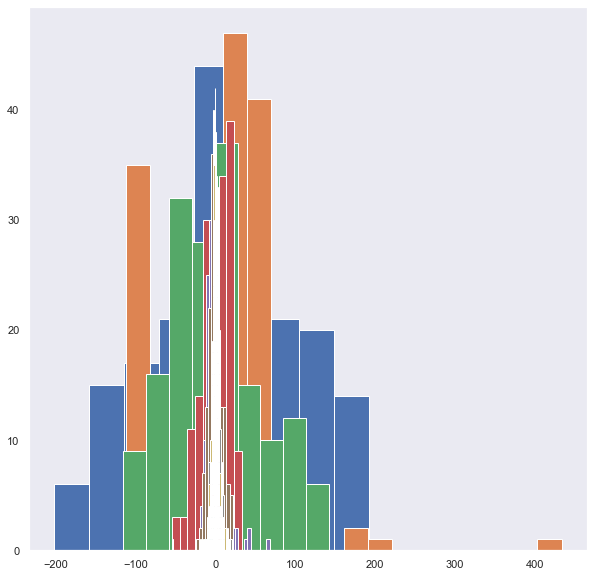

In [167]:
plt.subplots(figsize = (10,10))
for col in df_values:
    plt.hist(df_values[col], bins="auto")
plt.grid()
plt.show()

most data clusters together tightly. there seem to be 3 features that are more spread apart with 1 having some outliers far from the other data. This outlier might have to be removed depending on an outlier test

In [168]:
fig = px.box(df_values)
fig.show()

The boxplot of the data shows that there are outliers. as found before, the data might need to be normalized.

### Correlations

In [169]:
#correlation of the values using pearson
corr_matrix = df_values[df_values.columns.values].corr().abs()
corr_matrix

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.000000,0.041708,0.028695,0.076057,0.013712,0.052373,0.016908,0.046053,0.037217,0.046748,...,0.028925,0.030022,0.024708,0.024955,0.002520,0.019881,0.018560,0.057024,0.025943,0.032286
1,0.041708,1.000000,0.043172,0.019783,0.008371,0.008966,0.003308,0.008855,0.021718,0.012890,...,0.005368,0.017089,0.014384,0.001424,0.012147,0.012350,0.004888,0.020379,0.024367,0.007079
2,0.028695,0.043172,1.000000,0.070564,0.002763,0.002871,0.008408,0.008806,0.090029,0.030186,...,0.034596,0.044028,0.031256,0.005013,0.011213,0.048836,0.000353,0.022921,0.053242,0.035857
3,0.076057,0.019783,0.070564,1.000000,0.013192,0.027493,0.019275,0.051065,0.094024,0.023952,...,0.051799,0.019674,0.005013,0.018987,0.025383,0.059759,0.001855,0.003891,0.005615,0.030173
4,0.013712,0.008371,0.002763,0.013192,1.000000,0.004260,0.007232,0.025959,0.002687,0.011894,...,0.018083,0.010714,0.020395,0.015030,0.009955,0.014735,0.003238,0.000607,0.011486,0.002767
5,0.052373,0.008966,0.002871,0.027493,0.004260,1.000000,0.020004,0.020467,0.002156,0.002816,...,0.005299,0.036180,0.020204,0.007033,0.002810,0.013911,0.005370,0.004989,0.005221,0.033779
6,0.016908,0.003308,0.008408,0.019275,0.007232,0.020004,1.000000,0.023936,0.005770,0.003889,...,0.012208,0.035312,0.010799,0.007769,0.003682,0.009202,0.000428,0.009804,0.018152,0.022768
7,0.046053,0.008855,0.008806,0.051065,0.025959,0.020467,0.023936,1.000000,0.005888,0.000203,...,0.033876,0.027338,0.008899,0.020360,0.031496,0.017950,0.001465,0.011085,0.030341,0.017377
8,0.037217,0.021718,0.090029,0.094024,0.002687,0.002156,0.005770,0.005888,1.000000,0.033454,...,0.048191,0.017236,0.017815,0.003400,0.005688,0.058593,0.002620,0.015208,0.009148,0.011517
9,0.046748,0.012890,0.030186,0.023952,0.011894,0.002816,0.003889,0.000203,0.033454,1.000000,...,0.009060,0.002197,0.021094,0.014112,0.004557,0.010829,0.010563,0.011530,0.015543,0.012355


<AxesSubplot:>

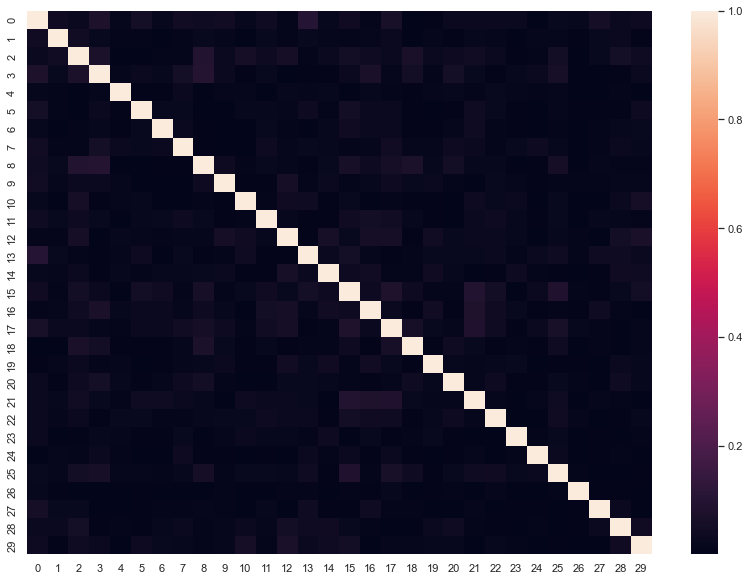

In [170]:
#heatmap of the correlations
sns.set(rc = {'figure.figsize':(14,10)})
sns.heatmap(corr_matrix)

The heatmap of the correlations shows that there is no correlation between 2 different value columns. it ofcourse does show the self correlation as the white diagonal line.
Since there is no correlation between the data, no data will be removed. if there was correlation, then one of the correlated data columns could be removed. this can be done because the remaining data will have the same influence as when the removed data was present.

### Normality

to determine for sure if the data is normally distributed or not, we perform the normaltest from scipy.stats.

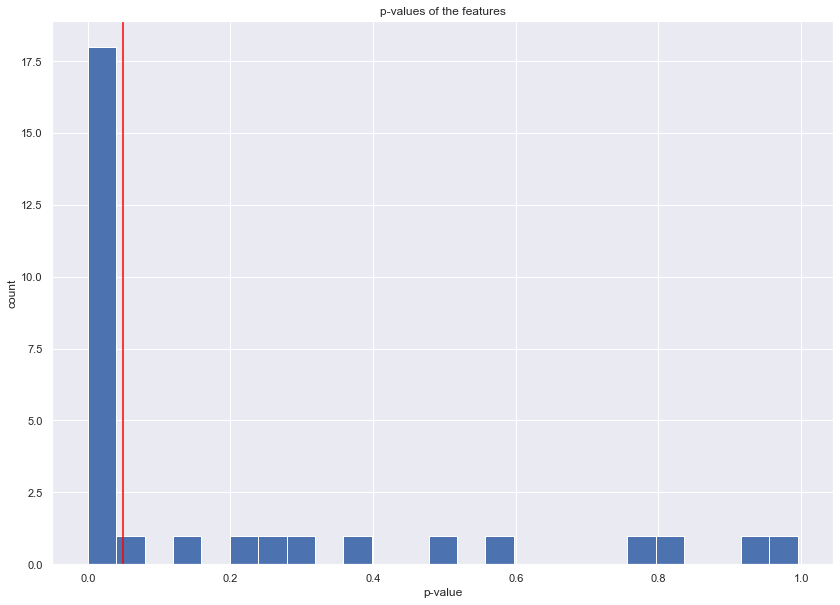

In [171]:
s2k2, p_val = stats.normaltest(df_values)
plt.hist(p_val, bins = 25)
plt.axvline(x = 0.05, color = "red")
plt.xlabel("p-value")
plt.ylabel("count")
plt.title("p-values of the features")
plt.show()

In [172]:
above = (p_val > 0.05).sum()
below = (p_val < 0.05).sum()

In [173]:
print("above 0.05:", below)
print("below 0.05:", above)

above 0.05: 19
below 0.05: 11


19 of the p-values are above 0.05. this means that the null hypothesis is accepted, the data is from a normal distribution.
The other 11 p-values are below the 0.05 threshold, these are not normally distributed

## Pre-proccessing

### Remove outliers

In [174]:
def outlier_removeall(df, df_values,n_std):
    """
    removed all rows that have outliers of n_std
    """
    df_filterd = df[(np.abs(stats.zscore(df_values)) < n_std).all(axis=1)]
    
    return df_filterd

df_filterd = outlier_removeall(df, df_values, 3)

In [175]:
df_filterd

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,Abbreviation,Genus,Species,Sex,Age
0,133.426742,-101.627603,21.125902,-11.518251,4.621089,-1.519551,0.583410,-7.182875,1.410030,0.216411,...,-0.301822,-0.433051,0.037651,-0.279618,-0.421040,Ph,Presbytis,hosei,U,A
1,145.344740,-108.229812,21.121390,-14.982879,2.299335,-2.354040,0.431199,-5.266930,-1.424469,-1.451953,...,0.215340,-0.299550,0.709472,0.876382,-0.150133,Ph,Presbytis,hosei,F,A
2,137.773342,-107.162743,18.232497,-17.116294,3.016809,-5.295234,1.716895,-1.668914,-1.917478,0.601120,...,-0.481468,-0.243025,-0.537644,-0.140292,0.082158,Pr,Presbytis,rubicunda,U,A
3,141.523739,-107.436626,17.448083,-16.861469,3.382894,-1.071286,1.768891,-2.735232,-1.136700,-2.706925,...,0.586941,-0.043639,-0.518699,-1.051100,0.542354,Pr,Presbytis,rubicunda,M,A
4,142.357906,-97.195294,10.511391,-6.520641,3.555506,1.652390,-0.655919,-5.373075,-1.466841,-2.626544,...,0.653851,0.718319,0.798722,-0.396749,0.844772,Pr,Presbytis,rubicunda,F,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,-91.085462,-46.160638,86.488654,16.969797,8.581993,-8.889106,3.806365,-2.572926,-1.852834,-0.197013,...,0.360452,0.513323,0.043604,0.294724,-0.003514,Hl,Hylobates,lar,F,A
161,-91.489354,-39.614165,87.430951,20.871706,11.444575,-6.707486,1.910320,-5.616304,-3.878495,-0.037360,...,-0.368755,-0.173323,-0.627292,0.092090,0.444992,Hl,Hylobates,lar,F,A
162,-90.204104,-40.985982,83.286250,19.714259,10.448984,-10.269775,4.749293,-2.725633,-1.577457,2.706787,...,-0.033229,0.434486,-0.158110,-0.416191,0.160474,Hl,Hylobates,lar,F,A
163,-90.248202,-50.111180,77.285086,19.578454,5.634918,-13.863556,1.840409,-0.507864,-1.227452,0.595468,...,0.125275,-0.018511,0.080169,-0.235063,0.317110,Hl,Hylobates,lar,F,A


after filtering away outliers of 3 standard deviations away. 145 rows remain in the dataframe.

In [176]:
fig1 = px.box(df_filterd[df_values.columns])
fig2 = px.box(df_values)
print("Filterd")
fig1.show()
print("Unfilterd")
fig2.show()

Filterd


Unfilterd


Comparing the filterd and unfilterd dataframes with the boxplots shows a decrease in outliers.
From the 165 rows/datapoints, 145 remain after removing the outliers.

Because there are now less datapoints. we will look at the amount of datapoints per group again.

In [177]:
df_filterd["Species"].value_counts()

lar             17
cristata        17
polykomos       10
mitis           10
badius           9
larvatus         9
rubicunda        8
anubis           8
fascicularis     7
torquatus        7
troglodytes      6
albigena         6
hosei            5
talapoin         5
gorilla          4
mulatta          3
patas            3
leucophaeus      2
fuscata          2
pygmaeus         2
paniscus         2
sphinx           1
sylvanus         1
syndactylus      1
Name: Species, dtype: int64

As mentioned before, species with too little datapoints might not be determined accuratly and might even make the determination of other groups less accurate. therefor, species with less then 5 datapoints are removed.

In [178]:
df_f2 = df_filterd.groupby("Species").filter(lambda x: len(x)>4)
df_f2["Species"].nunique()

14

This leaves 14 different species.

### Normalization

In [179]:
#Values
X = df_f2.iloc[:, 0:30]
#Labels
y = df_f2["Species"]

In [180]:
#normalizing the X
from sklearn.preprocessing import StandardScaler

def normalize(X):
    scalar = StandardScaler()
    scalar = scalar.fit(X)
    X = scalar.transform(X)
    return X

X = normalize(X)

## Dimensionality reduction

### T-SNE
t-SNE converts similarities between data points to joint probabilities. This technique is particulary sensitive to lowcal structure.
there are optimization parameters that will be optimized. the main parameter for this is the perplexity.

https://scikit-learn.org/stable/modules/manifold.html#

t-SNE looks like it should work the best
should be fast since the dataset is not large

In [181]:
X_embedded = TSNE(n_components=2, learning_rate="auto", init="random", perplexity = 30, random_state = 24).fit_transform(X)
X_embedded.shape

(124, 2)

In [182]:
df_f2

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,Abbreviation,Genus,Species,Sex,Age
0,133.426742,-101.627603,21.125902,-11.518251,4.621089,-1.519551,0.583410,-7.182875,1.410030,0.216411,...,-0.301822,-0.433051,0.037651,-0.279618,-0.421040,Ph,Presbytis,hosei,U,A
1,145.344740,-108.229812,21.121390,-14.982879,2.299335,-2.354040,0.431199,-5.266930,-1.424469,-1.451953,...,0.215340,-0.299550,0.709472,0.876382,-0.150133,Ph,Presbytis,hosei,F,A
2,137.773342,-107.162743,18.232497,-17.116294,3.016809,-5.295234,1.716895,-1.668914,-1.917478,0.601120,...,-0.481468,-0.243025,-0.537644,-0.140292,0.082158,Pr,Presbytis,rubicunda,U,A
3,141.523739,-107.436626,17.448083,-16.861469,3.382894,-1.071286,1.768891,-2.735232,-1.136700,-2.706925,...,0.586941,-0.043639,-0.518699,-1.051100,0.542354,Pr,Presbytis,rubicunda,M,A
4,142.357906,-97.195294,10.511391,-6.520641,3.555506,1.652390,-0.655919,-5.373075,-1.466841,-2.626544,...,0.653851,0.718319,0.798722,-0.396749,0.844772,Pr,Presbytis,rubicunda,F,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,-91.085462,-46.160638,86.488654,16.969797,8.581993,-8.889106,3.806365,-2.572926,-1.852834,-0.197013,...,0.360452,0.513323,0.043604,0.294724,-0.003514,Hl,Hylobates,lar,F,A
161,-91.489354,-39.614165,87.430951,20.871706,11.444575,-6.707486,1.910320,-5.616304,-3.878495,-0.037360,...,-0.368755,-0.173323,-0.627292,0.092090,0.444992,Hl,Hylobates,lar,F,A
162,-90.204104,-40.985982,83.286250,19.714259,10.448984,-10.269775,4.749293,-2.725633,-1.577457,2.706787,...,-0.033229,0.434486,-0.158110,-0.416191,0.160474,Hl,Hylobates,lar,F,A
163,-90.248202,-50.111180,77.285086,19.578454,5.634918,-13.863556,1.840409,-0.507864,-1.227452,0.595468,...,0.125275,-0.018511,0.080169,-0.235063,0.317110,Hl,Hylobates,lar,F,A


In [183]:
X_embedded.shape

(124, 2)

### Optimizing t-SNE with perplexity
The standard perplexity is 30. therefor values around 30 will be explored.
The method used is exact. This method takes more time than barnes hut but gives a better model. This method was chosen because the data set is small and thus shall not take very long using this method.

After finding the best perplexity, the iterations will also be optimized. there should at least be 250 iterations but more could benefit the model.

In [184]:
def plot_TSNE_ppy(X_embedded, df_f2):
    df_f2["X"] = X_embedded[:, 0]
    df_f2["Y"] = X_embedded[:, 1]
    ax = sns.scatterplot(x = "X", y = "Y", hue = "Species", data = df_f2, legend = False)
    
    return ax

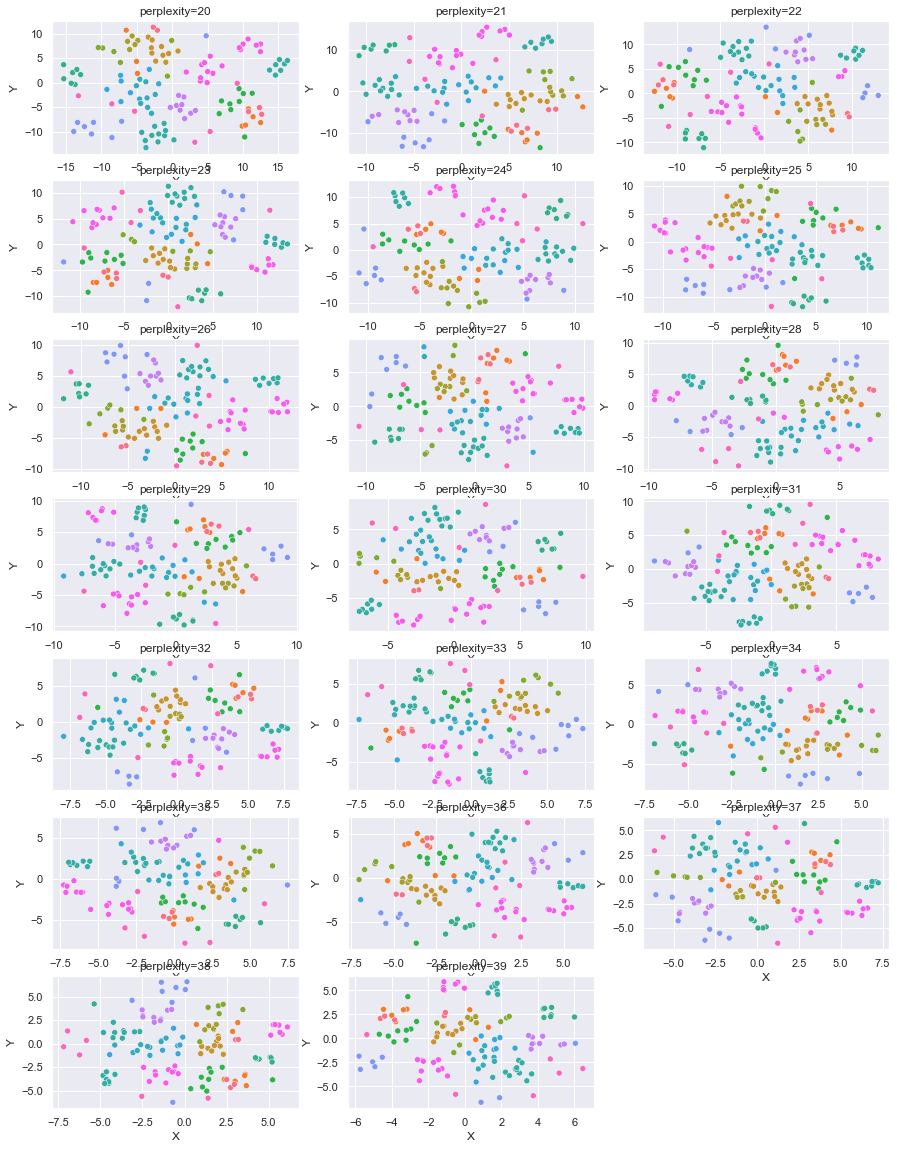

In [185]:
ppy = list(range(20, 40, 1))
fig = plt.figure(figsize=(15,20))
for i in range(20):
    ax = fig.add_subplot(7, 3, i+1)
    X_embedded = TSNE(n_components=2, learning_rate="auto", init="random", perplexity = ppy[i], random_state = 24, method = "exact").fit_transform(X)
    plot_TSNE_ppy(X_embedded, df_f2)
    ax.set_title(f"perplexity={ppy[i]}")
plt.show()

The perplexity that splits the clusters the best apears to be 24. there are ome outliers but most clusters are clearly split.

In [186]:
X_embedded = TSNE(n_components=2, learning_rate="auto", init="random", perplexity = 24, random_state = 24, method = "exact").fit_transform(X)

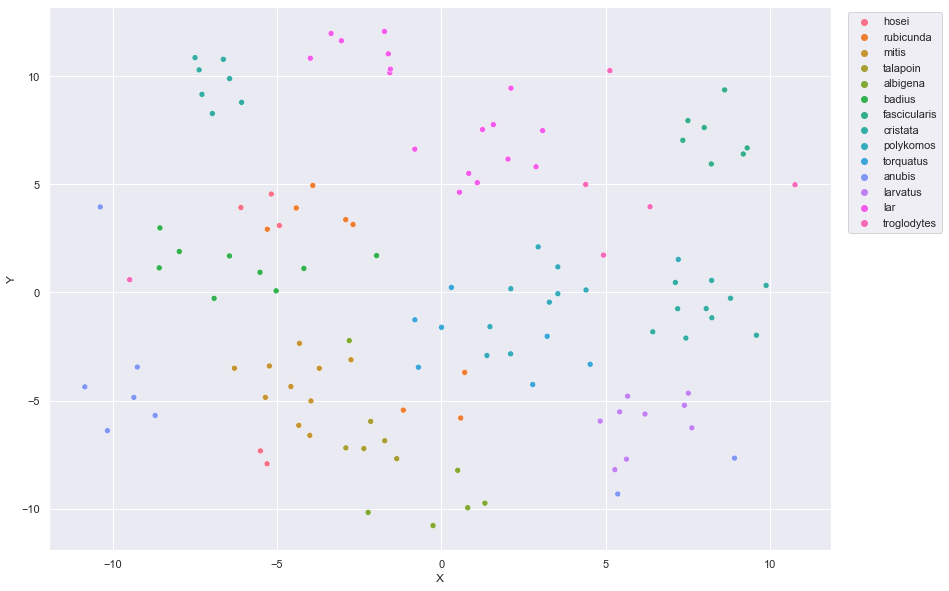

In [187]:
df_f2["X"] = X_embedded[:, 0]
df_f2["Y"] = X_embedded[:, 1]
sns.scatterplot(x = "X", y = "Y", hue = "Species", data = df_f2)
plt.legend(loc = "upper right", bbox_to_anchor = (1.15, 1))
plt.show()

This larger figure of 24 perplexity shows the splitting of the clusters and the few outliers that are present. 
## Iterations
the following step is optimizing the number of iterations. this will be at least 250 but more might be better.
we start with 250 iterations and go up to 1000 in steps of 50.

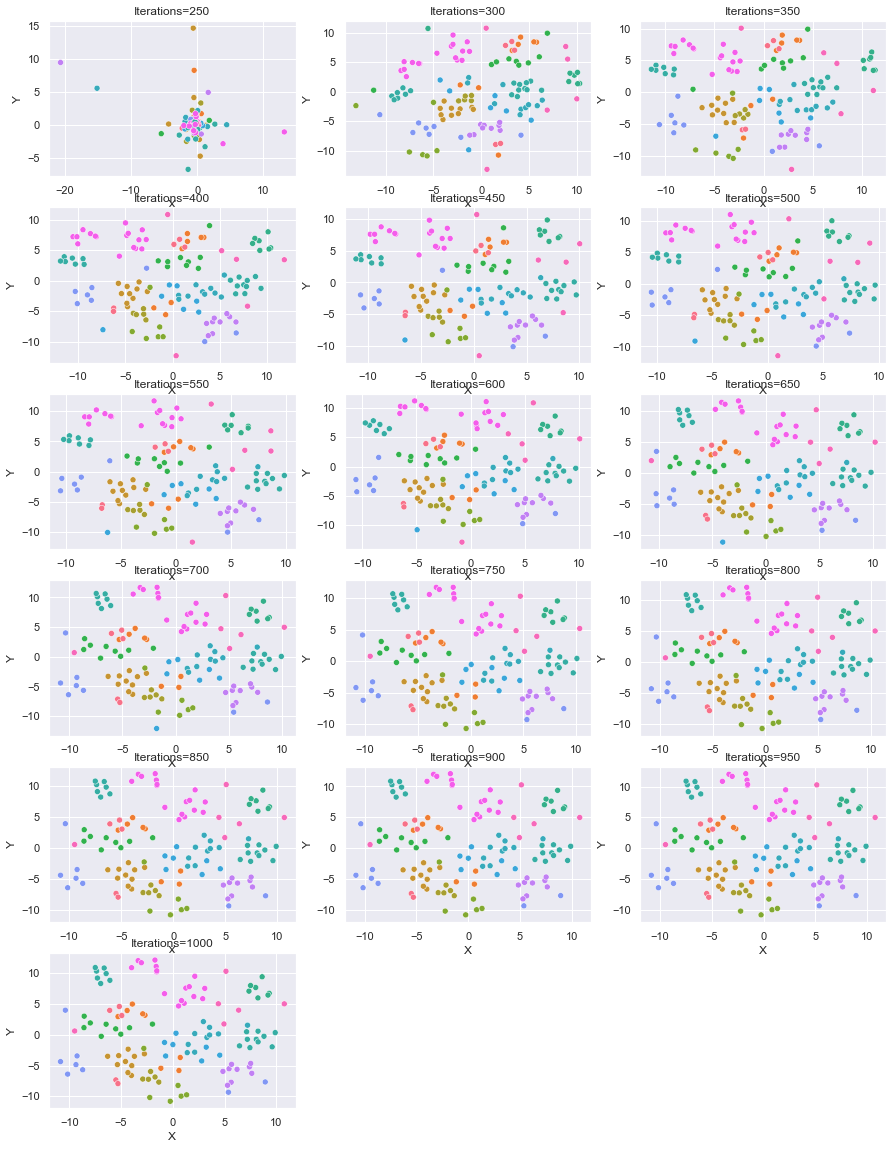

In [188]:
iter = list(range(250, 1001, 50))
fig = plt.figure(figsize=(15,20))
for i in range(len(iter)):
    ax = fig.add_subplot(6, 3, i+1)
    X_embedded = TSNE(n_components=2, learning_rate="auto", init="random", perplexity = 24, n_iter = iter[i], random_state = 24, method = "exact").fit_transform(X)
    plot_TSNE_ppy(X_embedded, df_f2)
    ax.set_title(f"Iterations={iter[i]}")
plt.show()

After 750 iterations, there appear to be no changes in the clustering. between 350 and 750 iterations, the changes are small but some outliers are removed after more iterations, this seems to stop at 750.

The results from optimizing are: method: exact, perplexity: 24, iterations: 750.

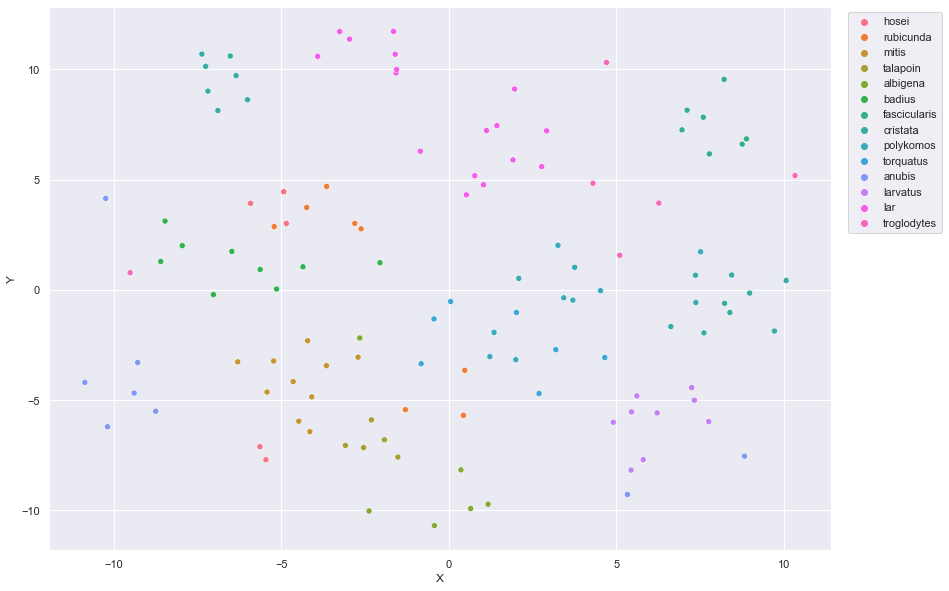

In [189]:
X_embedded = TSNE(n_components=2, learning_rate="auto", init="random", perplexity = 24, random_state = 24, method = "exact", n_iter = 750).fit_transform(X)
df_f2["X"] = X_embedded[:, 0]
df_f2["Y"] = X_embedded[:, 1]
sns.scatterplot(x = "X", y = "Y", hue = "Species", data = df_f2)
plt.legend(loc = "upper right", bbox_to_anchor = (1.15, 1))
plt.show()

## Clustering

for the clustering AgglomerativeClustering was used with ward method

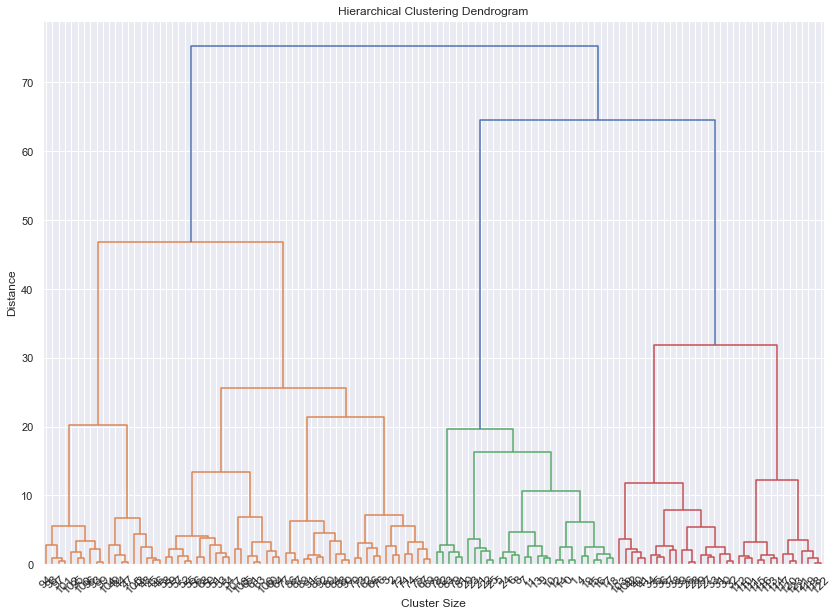

In [190]:
Z = linkage(X_embedded, "ward")

dendrogram(Z, leaf_rotation=45., leaf_font_size=12.)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.rcParams["figure.figsize"] = (14,6)
plt.show()

The dendrogram above shows the splitting of clusters using agglomerative clustering. The distance between the clusters and the number of clusters in plotted in an albowgraph to find where the slope levels

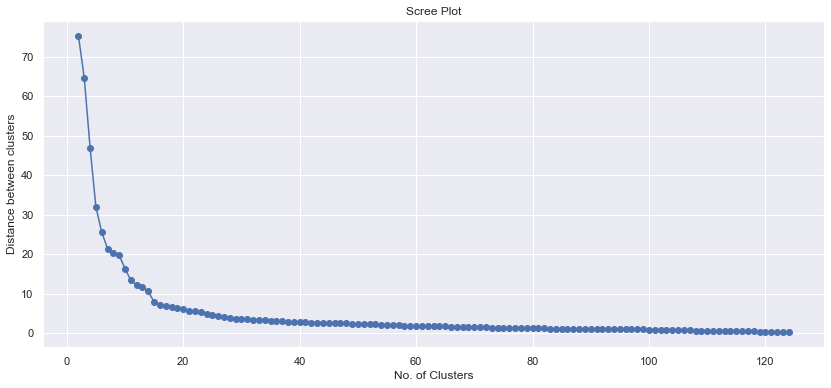

In [191]:
y=[]
# Appending distance between clusters at every iteration in for loop
for k in range(2,33):
    Hclustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward', compute_distances=True).fit(X_embedded)
    y.append(Hclustering.distances_)
    #print(y)
    
# X values = Number of clusters in decending order
x = np.array([i for i in range(124,1,-1)])

# Y values = Distance between clusters
y = np.array(y[0]) 

plt.title('Scree Plot')
plt.xlabel('No. of Clusters')
plt.ylabel('Distance between clusters')
plt.plot(x,y, marker='o')

In the elbowplot it seems like the curve levels around 10

In [192]:
print(y[-10])

13.335621340458482


printing the exact values at the 10th dot we see a distance of about 13. this would be the optimal distance between the optimal number of clusters.

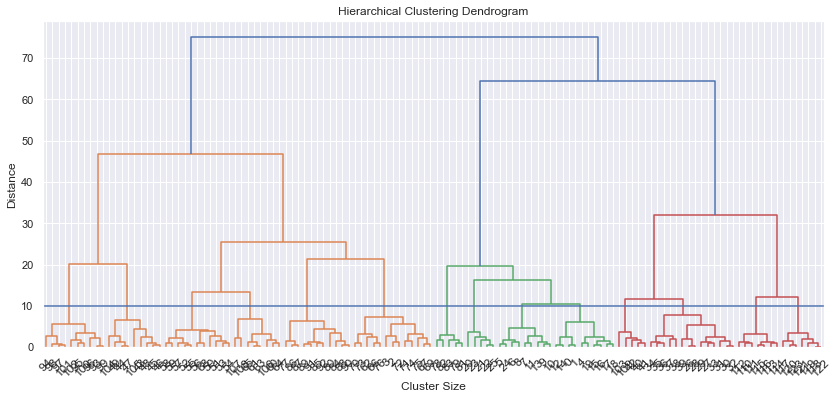

In [193]:
#plotting with line at distance 10
dendrogram(Z, leaf_rotation=45., leaf_font_size=12.)
plt.axhline(y=10) 
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.rcParams["figure.figsize"] = (14,6)
plt.show()

The plotted line cuts the clusters at 14 points. this means the optimal number of clusters is 14

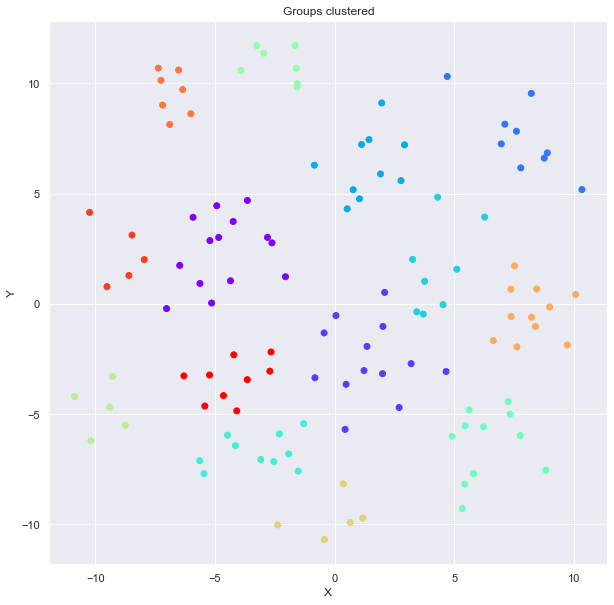

In [194]:
aggcluster = AgglomerativeClustering(n_clusters = 14)

#true_labels = df_f2["Species"].to_numpy()

plt.figure(figsize =(10, 10))
plt.scatter(X_embedded[:,0], X_embedded[:,1], 
           c = aggcluster.fit_predict(X_embedded), cmap ='rainbow')
#for i, label in enumerate(true_labels):
    #plt.annotate(label, (X_embedded[:, 0][i], X_embedded[:, 1][i]))
plt.title("Groups clustered")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [195]:
predict_labels = aggcluster.labels_
true_labels = df_f2["Species"].to_numpy()

In [196]:
metrics.adjusted_rand_score(true_labels, predict_labels)

0.5415331005710163

the clusters look to be split well but the score is not optimal. a score of 1 is perfect match where as 0 would be random. the score of 0.54 is not very high.

## OPTICS
Ordering Points To Identify the Clustering Structure (OPTICS), shares many similarities with DBSCAN. This method finds core sample of high density and expands clusters from them. unlike DBSCAN, It keeps cluster hierarchy for a variable neighborhood radius.
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.OPTICS.html#sklearn.cluster.OPTICS
https://scikit-learn.org/stable/modules/clustering.html#optics

In [225]:
OP_clustering = OPTICS(min_samples = 4)

In [226]:
OP_clustering.fit(X_embedded)

OPTICS(min_samples=4)

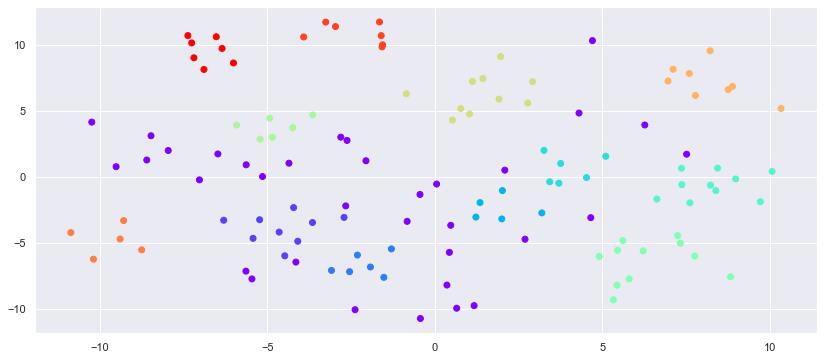

In [227]:
plt.scatter(X_embedded[:,0], X_embedded[:,1], 
           c = OP_clustering.fit_predict(X_embedded), cmap ='rainbow')

In [228]:
metrics.adjusted_rand_score(true_labels, OP_clustering.labels_)

0.4136461845651272

OPTICS is able to find clusters that are more isolated from the other datapoints, but when points get closer together it is unable to make clear clusters. the score of 0.41 shows that this method is not fit to use on this data.

## Conclusion
 AgglomerativeClustering seems to give the best results. it produces clear clusters but its score is not optimal and missclassificantion is seen often.
 
 A better model could be made if more data was available. the small groups of species made it difficult to get an accurate model. If less species were present, the model also could have performed better. this was also done creating this model. species with too little samples were removed as they would only increase the noise.
 
 after cleaning the data and taking only the datapoints that were usable, a clustering model was made using AgglomerativeClustering. This model was able to predict the species correctly with an accuracy of about 54%.